<a href="https://colab.research.google.com/github/ArjunRAj77/Discharge-summary-extractor/blob/main/ICD10_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ICD 10 Extractor**

Training a machine learning model to accurately identify ICD-10 codes in sentences is a complex task that requires a good understanding of both machine learning and the ICD-10 coding system. 

To build a model like this, you would need a large dataset of sentences that have been labeled with the correct ICD-10 codes, as well as a machine learning algorithm that can learn to map the sentences to the correct codes. You would then need to train the model on your dataset, using techniques like feature engineering and hyperparameter tuning to optimize its performance. 

It's also important to evaluate the model's performance on a separate test dataset to ensure it is accurate and reliable.

**Steps:**

1. Collecting and preparing a dataset of labeled examples (i.e., sentences and their corresponding ICD-10 codes).
2. Choosing a machine learning algorithm and implementing it in code.
3. Training the model on the dataset using techniques like feature engineering and hyperparameter tuning.
4. Evaluating the model's performance on a separate test dataset to ensure it is accurate and reliable.

## **Step 1 : Collecting Data for dataset creation.**

Since we are dealing with sensitive data, we need a reliable source of information.
- One possible source of this information is the World Health Organization (WHO), which maintains a database of ICD-10 codes and their corresponding descriptions.
-  collect this information from medical records or other healthcare databases.


The dataset we have generated for the usability of the ML model is :

 https://www.kaggle.com/datasets/mrhell/icd10cm-codeset-2023

## **Step 2 :  Choosing a machine learning algorithm and implementing it in code**.

This is the most trickier part. Since we are dealing with NER and text classification, a proper NLP should be models can be used:
- **RNN**
- **Transformer** 

Here we will be using Spacy modules for NER identification.

***spaCy*** is a popular natural language processing (NLP) library for Python. It provides tools and libraries for performing a variety of NLP tasks, such as tokenization, part-of-speech tagging, named entity recognition, and more.

The ***Matcher*** class in spaCy allows you to create and match patterns in text. A pattern is a list of dictionaries that defines the sequence of tokens and the conditions or constraints on the tokens that should be matched in the text. For example, a pattern can specify that a specific word or phrase should be matched, or that the text matched by the pattern should be optional, occur at least a certain number of times, or be in a specific part of speech.

Once you have created a pattern using the Matcher class, you can use the matcher object to match the pattern against a text. This will return a list of matches, where each match is a tuple consisting of the label of the pattern, the start and end indices of the match in the text, and the span of the match.

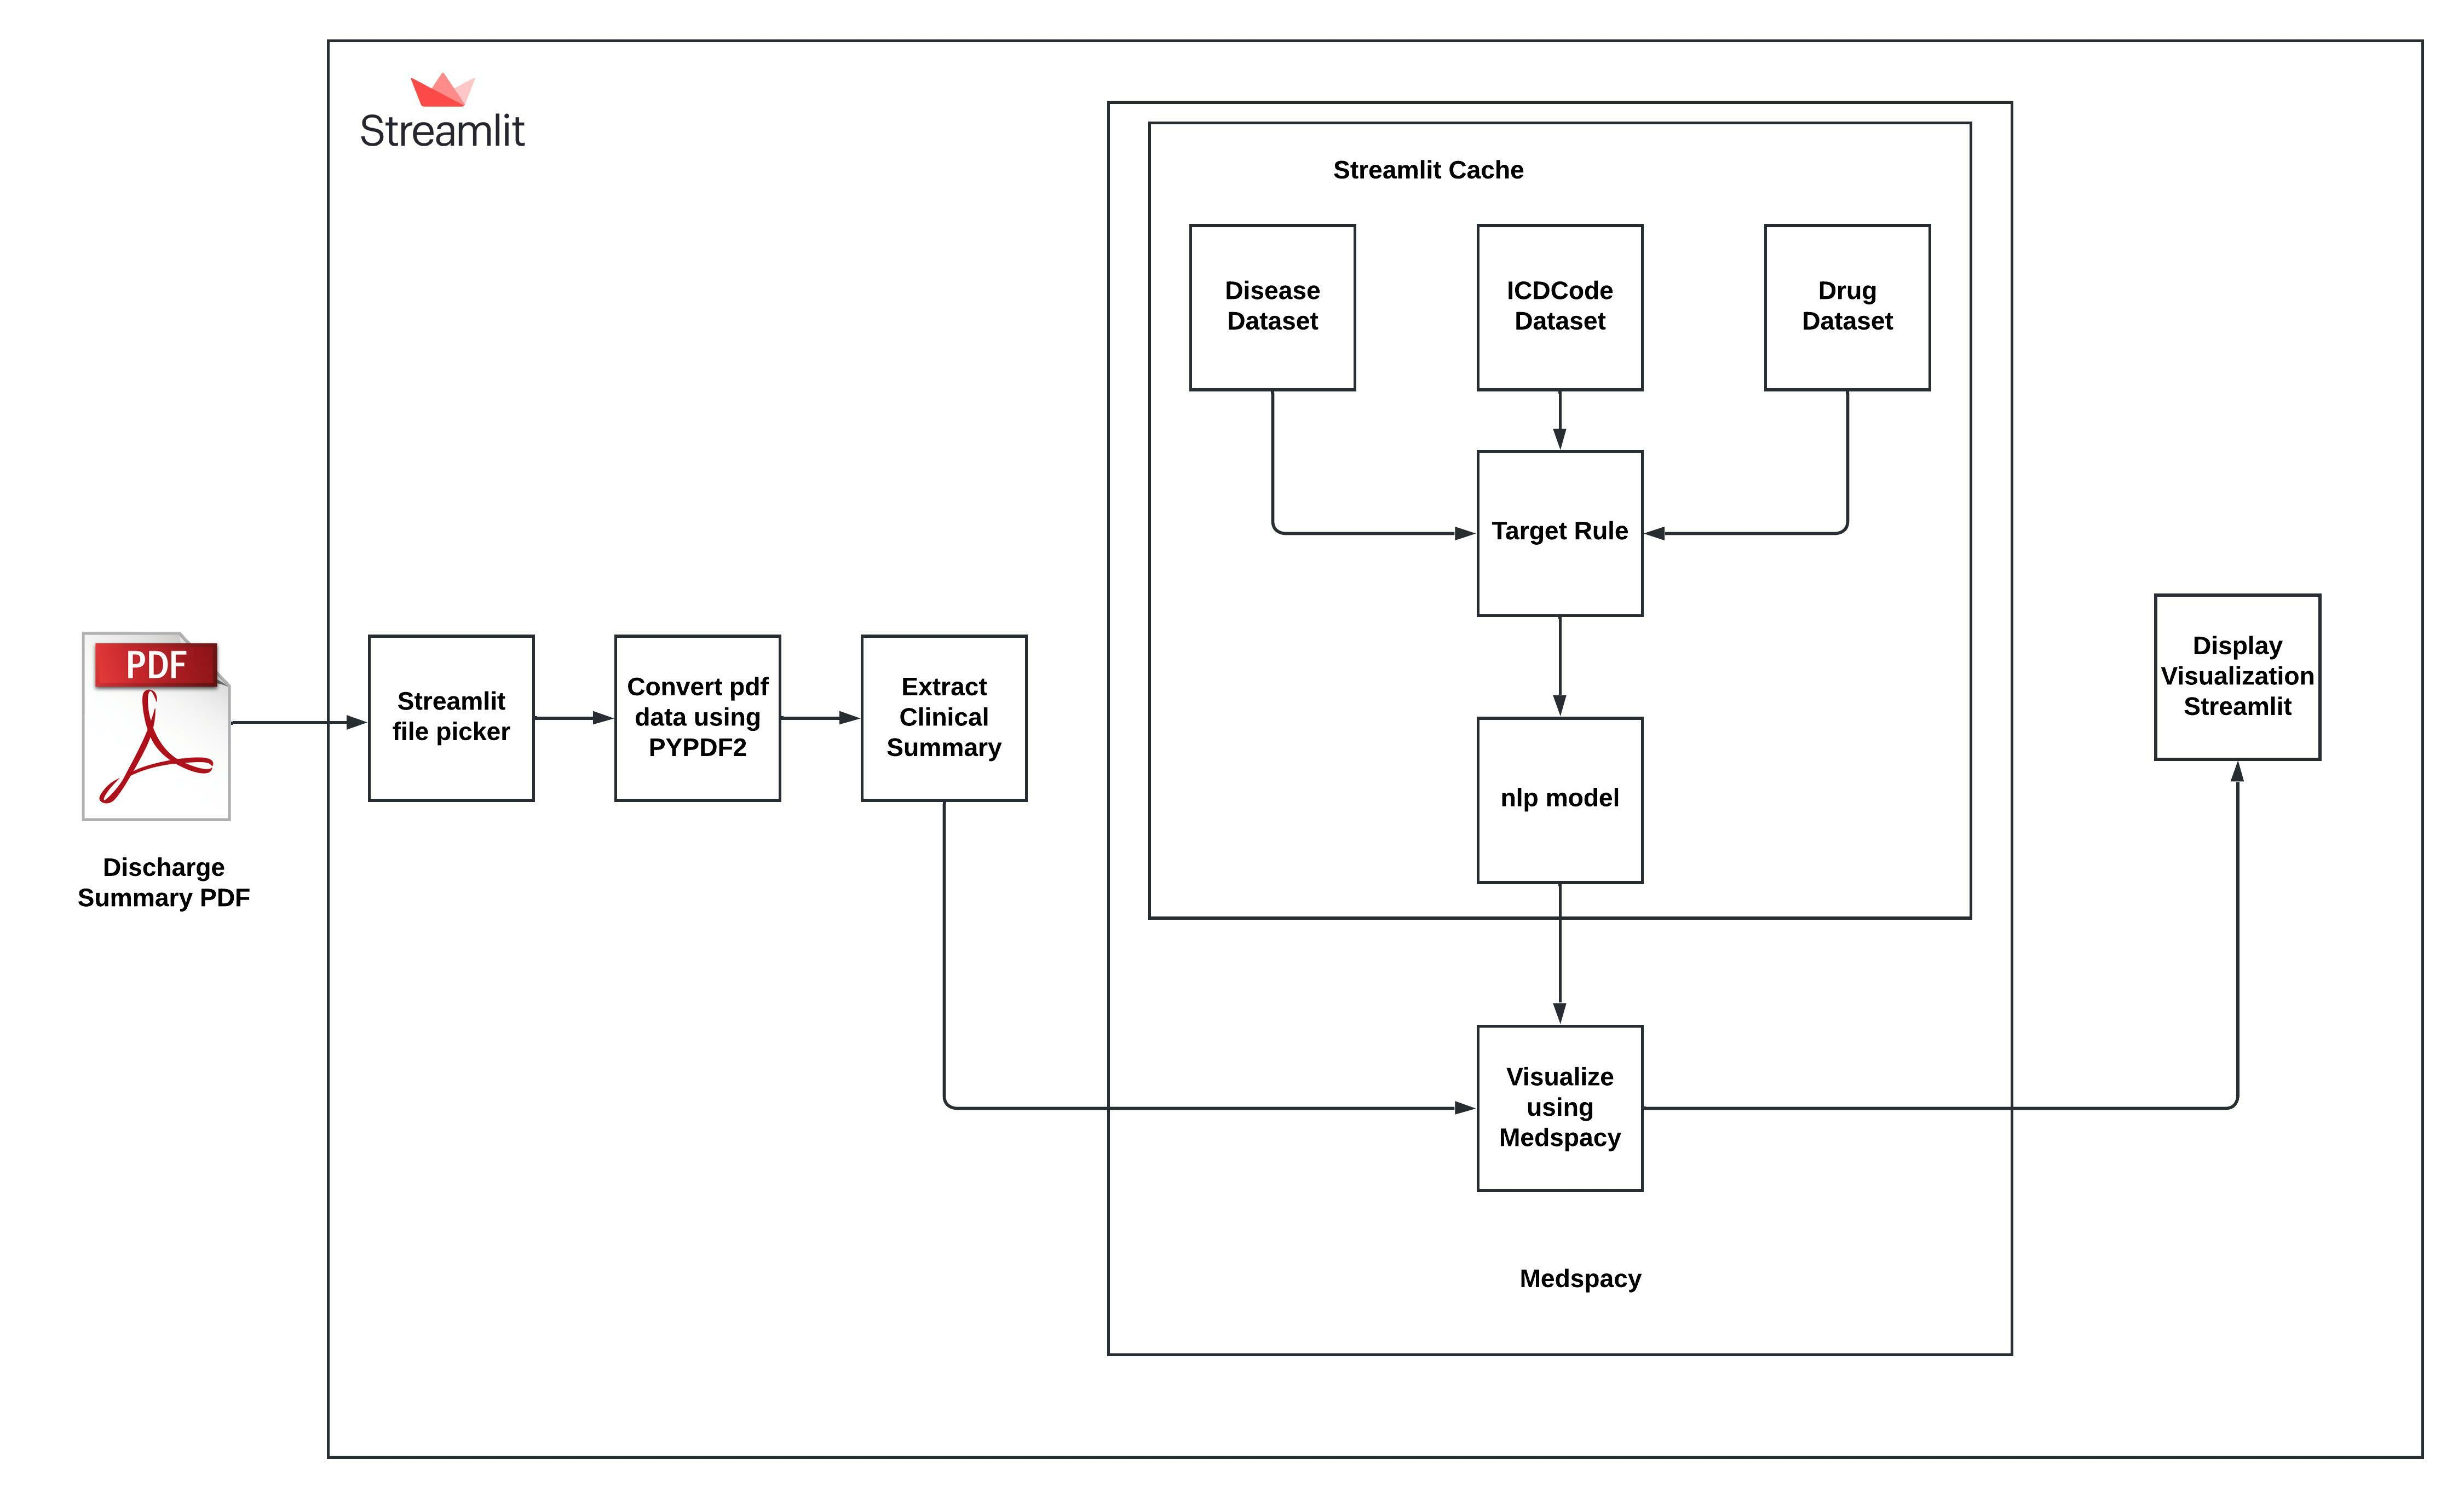

In [1]:
pip install ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ngrok: filename=ngrok-0.0.1-py3-none-any.whl size=3060 sha256=17fd83b1b74bad352ee237e7394e7658495759a279282ddec6c63c634262e5cb
  Stored in directory: /root/.cache/pip/wheels/2d/80/ee/a358486c0fd53be1c951260bf4ec7f511fa8dccf05966f88e4
Successfully built ngrok


In [2]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 761 kB 12.5 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=f8b11114c6893ccfc7cdd3601e2d27379a148ee66e6718a47c81ff9e02b361ca
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok


In [3]:
!./ngrok authtokens 2I25bavkwHYELR9tekrQDh8hpX7_e4JXyMTiF1UdcvBXdF7n

/bin/bash: ./ngrok: No such file or directory


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(port='8501')
public_url

In [ ]:
pip install streamlit

In [6]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
pip install spark-nlp-display

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 4.2 MB/s 
     |████████████████████████████████| 66 kB 5.3 MB/s 
     |████████████████████████████████| 448 kB 91.3 MB/s 
     |████████████████████████████████| 1.6 MB 63.8 MB/s 


In [8]:
pip install pyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 222 kB 13.8 MB/s 


In [9]:
pip install medspacy==0.2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 13.9 MB/s 
     |████████████████████████████████| 6.1 MB 31.4 MB/s 
     |████████████████████████████████| 69 kB 7.7 MB/s 
     |████████████████████████████████| 71 kB 9.9 MB/s 
     |████████████████████████████████| 558 kB 84.9 MB/s 
     |████████████████████████████████| 68 kB 5.6 MB/s 
     |████████████████████████████████| 575 kB 80.5 MB/s 
     |████████████████████████████████| 316 kB 71.4 MB/s 
     |████████████████████████████████| 235 kB 98.7 MB/s 
     |████████████████████████████████| 315 kB 97.0 MB/s 
     |████████████████████████████████| 671 kB 71.2 MB/s 
     |████████████████████████████████| 13.7 MB 63.9 MB/s 
  Created wheel for medspacy: filename=medspacy-0.2.0.1-py3-none-any.whl size=151113 sha256=fde17ee8fe5e10be7c8fad949dbf668a381933bead613dddad36976ffc622184
  Stored in directory: /root/.cache/pip/wheels/e9/83/

In [12]:
pip install target_matcher

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for target-matcher: filename=target_matcher-0.0.3-py3-none-any.whl size=5317 sha256=27bab527e72ad024e373cde552689c0ef4028d33c932bad002b89eac5fe88557
  Stored in directory: /root/.cache/pip/wheels/a1/c8/a2/250cee3bdc4d9c7c53a367f482769cf4fb241f443c1007060a
Successfully built target-matcher


In [29]:
%%writefile streamlit_app.py
# Importing libraries
from target_matcher import TargetMatcher, TargetRule
import pandas as pd
import streamlit as st
import spacy
from spacy import displacy
from PyPDF2 import PdfReader
import medspacy
from medspacy.ner import TargetRule
from medspacy.visualization import visualize_ent
from spacy.matcher import Matcher
import re
from spacy.tokens import Span


st.title('Discharge Summary Extractor')
uploaded_file = st.file_uploader("Choose a file")

@st.cache(allow_output_mutation=True)
def loading_ml_model(): 
  # Register a new custom attribute to store ICD-10 diagnosis codes
  Span.set_extension("icd10_code", default="")
  # Load medspacy model
  nlp = medspacy.load()
  print(nlp.pipe_names)
  print("Started adding rules to nlp model..........")
  matcher = Matcher(nlp.vocab)
  # ICD Description
  ICDDescription=[" Achilles tendon rupture","Adrenal cancer","Atrial fibrillation","Aplastic anemia","Autoimmune pancreatitis","Gangosa","Monkeypox"]
  # ICD Code 
  ICDcode=['A00','A0103','A0105','A0104','A250','A665','B04']
  len_codes=len(ICDcode)

  # Add rules for target concept extraction
  target_matcher = nlp.get_pipe("medspacy_target_matcher")
  target_rules=[]
  
  # Creating rules for identifying the disease and its symptoms
  for i in range(len_codes):
      words = re.findall(r'\b\w+\b', ICDDescription[i]) # selecting only the words, omitting the special characters
      des_pattern=[{'OP': '?'}]
      counter=1
      for word in words:
        if counter==1:
          text_pattern={'TEXT': f'{word}'} 
          des_pattern.append(text_pattern)
        else :
          if len(words)==1:
            text_pattern={'TEXT': f'{word}'} 
            des_pattern.append(text_pattern)
          else :
            text_pattern={'TEXT': f'{word}'} 
            simple_extender={'OP':'*'}
            des_pattern.append(simple_extender)
            des_pattern.append(text_pattern)
        counter=counter+1
      print(des_pattern)
      rules=TargetRule(literal=f'{ICDDescription[i]}',category='PROBLEM',pattern=des_pattern, attributes={"icd10_code": f"{ICDcode[i]}"})
      target_rules.append(rules)
  print("Printing out the various pattern rules.")
  print(target_rules)
  target_matcher.add(target_rules)

  
  return nlp,target_matcher

def table_creation(matches):
    column_names = ["Disease","ICDCode"]
    summary_df = pd.DataFrame(columns = column_names)
    diseaselist=[]
    icdlist=[]
    for ent in matches.ents:
        print(ent, ent._.target_rule.literal, ent._.icd10_code, sep="\t")
        if ent._.target_rule.category == "PROBLEM":
            diseaselist.append(ent._.target_rule.literal)
            icdlist.append(ent._.icd10_code)
    summary_df["Disease"] = diseaselist
    summary_df["ICDCode"] = icdlist
    st.markdown('---')
    st.subheader("Identified diseases and ICD codes : ")
    st.table(summary_df)
    pass

def post_processing(doc):
    problem_label=[]
    medication_label=[]
    for ent in doc.ents:
        if ent.label_=='PROBLEM':
          problem_label.append(ent)
        if ent.label_=='MEDICATION':
          medication_label.append(ent) 
    print(problem_label)
    print(medication_label)
    prob_len=len(problem_label)
    med_len=len(medication_label)
    st.subheader("Summary:")
    st.write(f" Total number of identified diseases/problems in the file : {prob_len}")
    st.write(f" Total number of identified medications prescribed in the file : {med_len}")
    st.write(problem_label)
    pass

if(uploaded_file is not None):
  reader = PdfReader(uploaded_file)
  print("Successfully read the file!")
  nlp,target_matcher=loading_ml_model()
  print("Completed loading the NLP model.")
  st.markdown('**Successfully loaded NLP model.**')
  if st.button('Extract Data'):
    st.markdown('---')
    st.subheader('Output Overview ')
    number_of_pages = len(reader.pages)
    text_data=""
    for i in range(number_of_pages):
        page = reader.pages[i]
        text_data = text_data+ ' '+page.extract_text()

    # Processing Data with nlp model
    doc = nlp(text_data)
    matches=target_matcher(doc)
    # Visualization of extracted data
    colors = {"PROBLEM": "orange", "MEDICATION": "green"}
    options = {"colors": colors}
    html =displacy.render(doc, style="ent", page=True,options=options)
    st.components.v1.html(html, width=1500, height=1000, scrolling=True)
    print("Visualization Completed.")
    print("Printing the summary table")
    if st.checkbox('Show identified ICDCodes'):
      table_creation(matches)
    # print(df)
    # post_processing(doc)
     

Overwriting streamlit_app.py


In [30]:
!streamlit run /content/streamlit_app.py & npx localtunnel --port 8501 

npx: installed 22 in 1.96s



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.204.227.229:8501

your url is: https://famous-snakes-ring-35-204-227-229.loca.lt
  Stopping...
^C
